Ecco le prime righe dei dati caricati:
               Test1     Test2     Test3     Test4     Test5     Test6  \
Date                                                                     
2003-04-19 -0.060578  0.568861  0.209988  0.803163  0.304984 -0.301566   
2003-04-20 -0.352434 -0.389436 -0.269946 -0.893448  0.441027 -0.980283   
2003-04-21  0.801850 -0.516368  0.073380 -0.972182  0.880466 -0.585160   
2003-04-22 -0.349898  0.557430 -0.212606 -0.468799 -0.666265 -0.102560   
2003-04-23 -0.143773 -0.687666 -0.186770  0.493783  0.392751  0.958399   

               Test7  
Date                  
2003-04-19 -0.047559  
2003-04-20 -0.805112  
2003-04-21  0.920937  
2003-04-22 -0.821318  
2003-04-23  0.494005  
Il tuo portafoglio ha 7 securities. Inserisci i pesi che sommano a 1:


Inserisci il peso per la security 'Test1':  0.1
Inserisci il peso per la security 'Test2':  0.1
Inserisci il peso per la security 'Test3':  0.1
Inserisci il peso per la security 'Test4':  0.1
Inserisci il peso per la security 'Test5':  0.1
Inserisci il peso per la security 'Test6':  0.1
Inserisci il peso per la security 'Test7':  0.4



Massimo Drawdown Relativo del Portafoglio: -69.4409%


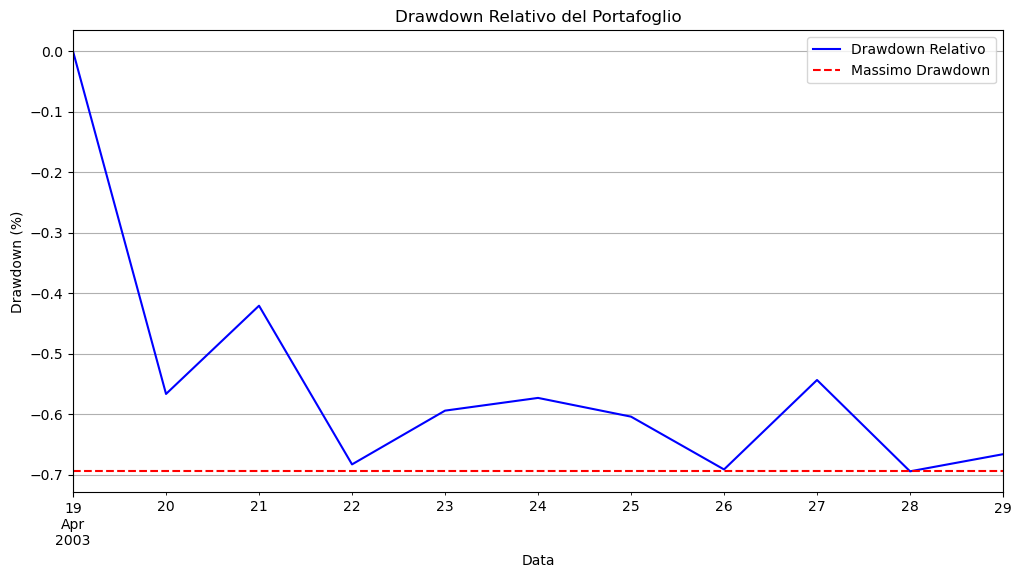

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_portfolio_returns(returns, weights):     #    Calcola i rendimenti giornalieri del portafoglio basati sui rendimenti delle securities e i pesi.
            
    return returns.dot(weights)

def calculate_relative_drawdowns(portfolio_returns):     #    Calcola i drawdown relativi del portafoglio.

    cumulative_returns = (1 + portfolio_returns).cumprod()
    peaks = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - peaks) / peaks
    max_drawdown = drawdowns.min()
    return drawdowns, max_drawdown

def load_data(file_path):
    try:
        # Leggi il file Excel, salta la prima riga (header) e usa la seconda riga come intestazione
        data = pd.read_excel(file_path, header=1)  # La seconda riga diventa l'intestazione delle colonne
        
        # Imposta la seconda colonna (date) come indice temporale
        data.set_index(data.columns[1], inplace=True)  # Usa la seconda colonna come indice
        data.index.name = "Date"  # Rinomina l'indice
        
        # Rimuovi la prima colonna ("DATA")
        data.drop(data.columns[0], axis=1, inplace=True)
        
        # Mantieni solo le colonne numeriche (se presenti)
        numeric_data = data.select_dtypes(include=[np.number])
        
        if numeric_data.empty:
            raise ValueError("Il file non contiene dati numerici validi.")
        
        return numeric_data
    except Exception as e:
        print(f"Errore durante il caricamento dei dati: {e}")
        exit()



if __name__ == "__main__":
    # Carica il file Excel con i rendimenti delle securities
    file_path = r"C:\Users\Mattia\Desktop\Patavino Capitals Quant Specialist Task\Correlation Valuation\Assets Returns.xlsx"  # Modifica con il tuo file
    data = load_data(file_path)
    
    print("Ecco le prime righe dei dati caricati:")
    print(data.head())
    
    # Chiedi all'utente di inserire i pesi
    num_securities = data.shape[1]
    print(f"Il tuo portafoglio ha {num_securities} securities. Inserisci i pesi che sommano a 1:")
    weights = []
    for i in range(num_securities):
        while True:
            try:
                weight = float(input(f"Inserisci il peso per la security '{data.columns[i]}': "))
                if weight < 0 or weight > 1:
                    raise ValueError("Il peso deve essere compreso tra 0 e 1.")
                weights.append(weight)
                break
            except ValueError as e:
                print(f"Errore: {e}. Riprova.")
    
    # Controlla che i pesi sommino a 1
    if not np.isclose(sum(weights), 1):
        print("Errore: I pesi non sommano a 1. Riprova.")
        exit()
    
    # Calcola i rendimenti giornalieri del portafoglio
    portfolio_returns = calculate_portfolio_returns(data, weights)
    
    # Calcola i drawdown relativi
    drawdowns, max_drawdown = calculate_relative_drawdowns(portfolio_returns)
    
    print(f"\nMassimo Drawdown Relativo del Portafoglio: {max_drawdown:.4%}")
    
    # Visualizza i risultati
    plt.figure(figsize=(12, 6))
    drawdowns.plot(label="Drawdown Relativo", color="blue")
    plt.axhline(max_drawdown, color="red", linestyle="--", label="Massimo Drawdown")
    plt.title("Drawdown Relativo del Portafoglio")
    plt.xlabel("Data")
    plt.ylabel("Drawdown (%)")
    plt.legend()
    plt.grid()
    plt.show()


Anteprima dei dati caricati:
               Test1     Test2     Test3     Test4     Test5     Test6  \
Date                                                                     
2003-04-19 -0.060578  0.568861  0.209988  0.803163  0.304984 -0.301566   
2003-04-20 -0.352434 -0.389436 -0.269946 -0.893448  0.441027 -0.980283   
2003-04-21  0.801850 -0.516368  0.073380 -0.972182  0.880466 -0.585160   
2003-04-22 -0.349898  0.557430 -0.212606 -0.468799 -0.666265 -0.102560   
2003-04-23 -0.143773 -0.687666 -0.186770  0.493783  0.392751  0.958399   

               Test7  
Date                  
2003-04-19 -0.047559  
2003-04-20 -0.805112  
2003-04-21  0.920937  
2003-04-22 -0.821318  
2003-04-23  0.494005  

Inserisci i pesi per ciascuna security (somma deve essere 1):


Inserisci il peso per la security 'Test1':  0.1
Inserisci il peso per la security 'Test2':  0.1
Inserisci il peso per la security 'Test3':  0.1
Inserisci il peso per la security 'Test4':  0.1
Inserisci il peso per la security 'Test5':  0.1
Inserisci il peso per la security 'Test6':  0.1
Inserisci il peso per la security 'Test7':  0.4



Drawdown Futuro Medio: -100.1469%
Peggior Drawdown Futuro Simulato: -139.3829%


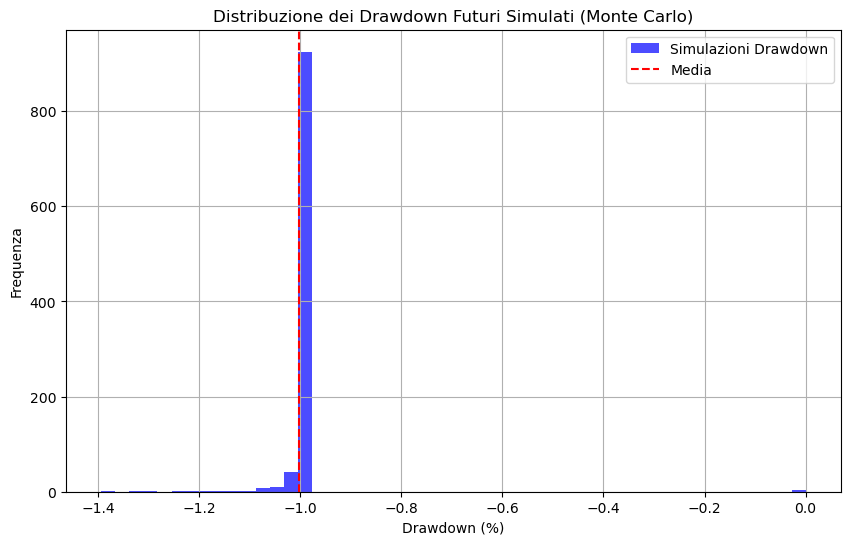

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_drawdown(returns):   #    Calcola i drawdown relativi di una serie di rendimenti.
    if isinstance(returns, np.ndarray):
        returns = pd.Series(returns)
    
    cumulative_returns = (1 + returns).cumprod()
    peaks = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - peaks) / peaks
    max_drawdown = drawdowns.min()
    return drawdowns, max_drawdown

def simulate_future_drawdowns(historical_returns, weights, num_simulations=1000, days=252):   #    Simula scenari futuri e calcola il drawdown massimo per ciascuno.
    
    # Calcola la media e la deviazione standard del portafoglio ponderato
    portfolio_mean = np.dot(historical_returns.mean(), weights)
    portfolio_std = np.sqrt(np.dot(weights, np.dot(historical_returns.cov(), weights)))
    
    simulated_drawdowns = []
    
    for _ in range(num_simulations):
        # Genera rendimenti simulati basati su media e deviazione storiche
        simulated_returns = np.random.normal(portfolio_mean, portfolio_std, days)
        _, max_drawdown = calculate_drawdown(simulated_returns)
        simulated_drawdowns.append(max_drawdown)
    
    return simulated_drawdowns

if __name__ == "__main__":
    # Carica il file Excel con i rendimenti storici delle securities
    file_path = r"C:\Users\Mattia\Desktop\Patavino Capitals Quant Specialist Task\Correlation Valuation\Assets Returns.xlsx"
    data = pd.read_excel(file_path, header=1)
    
    # Usa la seconda colonna come indice temporale
    data.set_index(data.columns[1], inplace=True)
    data.index.name = "Date"
    data.drop(data.columns[0], axis=1, inplace=True)  # Rimuovi la colonna "DATA"
    
    print("Anteprima dei dati caricati:")
    print(data.head())
    
    # Specifica i pesi del portafoglio
    print("\nInserisci i pesi per ciascuna security (somma deve essere 1):")
    num_securities = data.shape[1]
    weights = []
    for i in range(num_securities):
        weight = float(input(f"Inserisci il peso per la security '{data.columns[i]}': "))
        weights.append(weight)
    
    # Controlla che i pesi sommino a 1
    if not np.isclose(sum(weights), 1):
        print("Errore: I pesi non sommano a 1. Riprova.")
        exit()
    
    # Simula i drawdown futuri
    simulated_drawdowns = simulate_future_drawdowns(data, weights, num_simulations=1000, days=252)
    
    # Analizza i risultati della simulazione
    avg_drawdown = np.mean(simulated_drawdowns)
    worst_drawdown = np.min(simulated_drawdowns)
    print(f"\nDrawdown Futuro Medio: {avg_drawdown:.4%}")
    print(f"Peggior Drawdown Futuro Simulato: {worst_drawdown:.4%}")
    
    # Visualizza la distribuzione dei drawdown futuri
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_drawdowns, bins=50, alpha=0.7, color="blue", label="Simulazioni Drawdown")
    plt.axvline(avg_drawdown, color="red", linestyle="--", label="Media")
    plt.title("Distribuzione dei Drawdown Futuri Simulati (Monte Carlo)")
    plt.xlabel("Drawdown (%)")
    plt.ylabel("Frequenza")
    plt.legend()
    plt.grid()
    plt.show()

